### Exploratory Data Analysis and Intro 
#### Goal 
1) Investigate top-paying roles and skills in data science industry 
2) Use Python to explore real-live dataset on job postings 
3) Allow job seekers to use these insights to help find best job oppurtunities 

#### Final Deliverables 
1) Create Jupyter Notebooks showcasing core Python skills 
2) Create a summary page via (Read.md) capturing findings
3) Share project via Github and Linkedin

In [11]:
#Importing Libraries 

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

#Loading Data 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup 

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [ ]:
#Filtering data to only include Data Analyst jobs in the United States 

df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [10]:
#Doing some basic EDA to get an idea of where a majority of the job postings are

df_plot = df_da_us['job_location'].value_counts().head(10).to_frame()

df_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


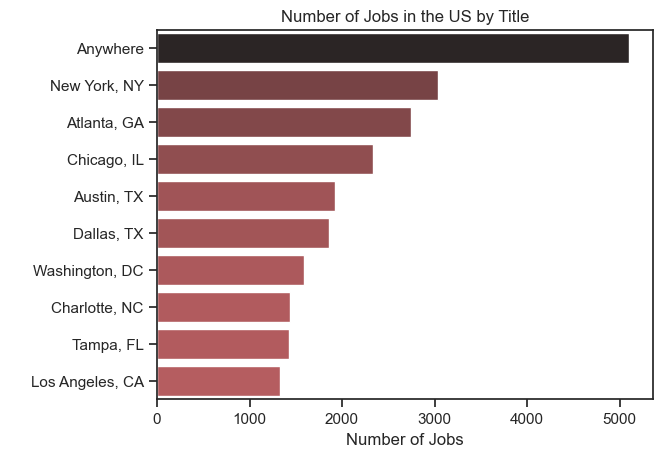

In [ ]:
#Plotting the dataframe of job posting locations to visualize data

sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:r_r', legend=False)
sns.set_theme(style='ticks')

#Cleaning up Title, Legend and Axes 

plt.title("Number of Jobs in the US by Title")
plt.ylabel(" ")
plt.xlabel("Number of Jobs")
plt.show()


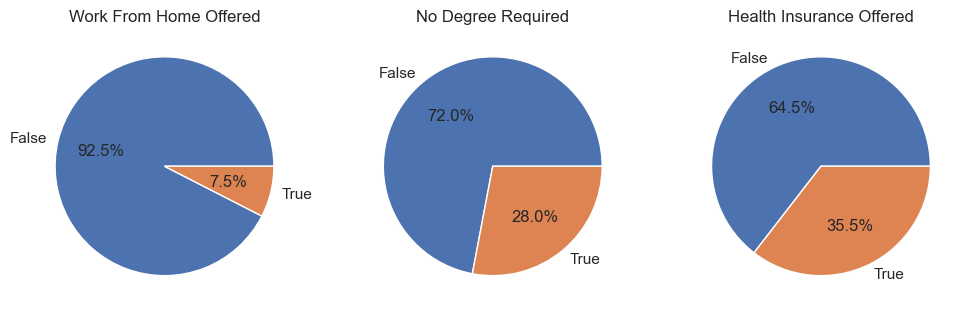

In [39]:
#Doing some basic EDA on three columns in my dataframe specified by boolean values

dict_column = {
    'job_work_from_home': 'Work From Home Offered', 
    'job_no_degree_mention': 'No Degree Required',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,6))

#creating a for loop to plot all three columns into subplot 

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_da_us[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%')
    ax[i].set_title(title)
    #print(i, column, title)

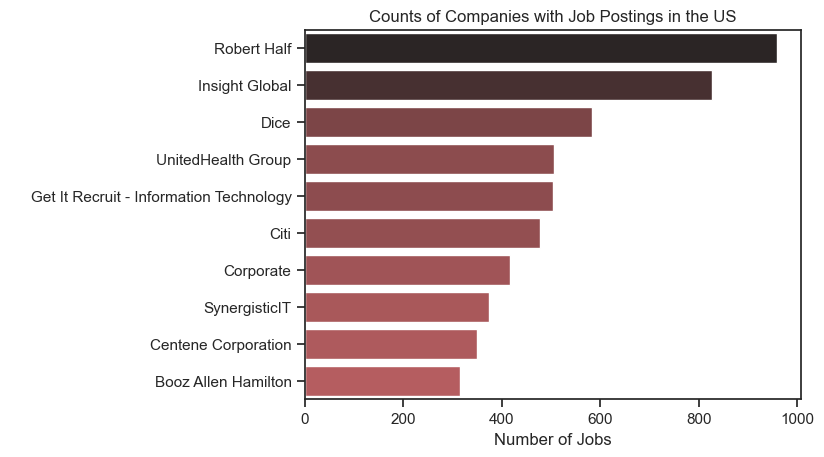

In [42]:
#EDA of different companies that are posting jobs in the US

df_plot = df_da_us['company_name'].value_counts().head(10).to_frame()


sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:r_r', legend=False)
sns.set_theme(style='ticks')

#Cleaning up Title, Legend and Axes 

plt.title("Counts of Companies with Job Postings in the US")
plt.ylabel(" ")
plt.xlabel("Number of Jobs")
plt.show()

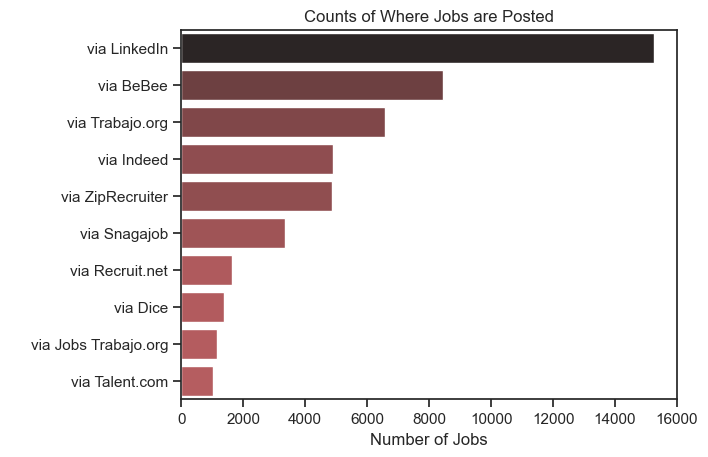

In [ ]:
#EDA of job boards being used in the US 

df_plot = df_da_us['job_via'].value_counts().head(10).to_frame()


sns.barplot(data=df_plot, x='count', y='job_via', hue='count', palette='dark:r_r', legend=False)
sns.set_theme(style='ticks')

#Cleaning up Title, Legend and Axes 

plt.title("Counts of Where Jobs are Posted")
plt.ylabel(" ")
plt.xlabel("Number of Jobs")
plt.show()